# Statistics & Public Health 1: Cleaning and EDA


West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

We are given mosquito tracking data from 2008 to 2019.

In this deliverable, we will perform basic EDA and data wrangling to get familiar with the dataset from the city of Chicago.

| **Field**          | **Description** | **DataType** | **Notes** |
|---------------------|--------------------------------------------------------------------------------------------------------------------|---------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **Year**           | Year that the WNV test is performed                                                                                | `int64`       |                                                                                                                                       |
| **Week**           | Week that the WNV test is performed                                                                                | `int64`       |                                                                                                                                       |
| **Address Block**  | Address of the location of trap                                                                                    | `string`      |                                                                                                                                       |
| **Block**          | Block number of address                                                                                           | `int64`       |                                                                                                                                       |
| **Trap**           | ID of the trap                                                                                                    | `string`      | Some traps are "satellite traps". These traps are set up near (within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters (e.g., T220A is a satellite trap to T220). |
| **Trap Type**      | Type of trap                                                                                                      | `string`      |                                                                                                                                       |
| **Date**           | Date and time that the WNV test is performed                                                                      | `string`      | Records only exist if a particular species of mosquitoes is found at a certain trap at a certain time.                                |
| **Mosquito Number**| Number of mosquitoes caught in this trap                                                                          | `int64`       | When the number of mosquitoes exceeds 50, they are split into another record (another row in the dataset), capping at 50 per record.  |
| **Mosquito ID**    | ID for Mosquito species                                                                                           | `string`      |                                                                                                                                       |
| **WNV Present**    | Whether West Nile Virus was present in these mosquitoes                                                           | `string`      |                                                                                                                                       |
| **Species**        | Mosquito species                                                                                                  | `string`      |                                                                                                                                       |
| **Lat**            | Latitude of trap                                                                                                  | `float64`     |                                                                                                                                       |
| **Lon**            | Longitude of trap                                                                                                | `float64`     |                                                                                                                                       |

#####################################################################################################################################################

## Library import

In [6]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Setting globally figure size in the notebook
plt.rcParams["figure.figsize"] = (8, 6)

# Part 1 - Basic Data Wrangling


In [9]:
# Read in data
df = pd.read_csv('mosquito_data.csv')
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


## Q1. What is shape of the data frame?

In [11]:
df.shape

(18495, 13)

###  The data frame contains 18,495 rows and 13 columns/ features

In [13]:
# Alternate way to find shape of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


## Q2.Convert the 'Date' column to have a datetime format.

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18495 entries, 0 to 18494
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
18495 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.6 KB


## Q3.Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [18]:
cat_var=list(df.select_dtypes(include=['object'])) # storing all categorical variables as a list
cat_var

['Address Block', 'Trap', 'Trap type', 'Mosquito ID', 'WNV Present', 'Species']

In [19]:
num_var=list(df.select_dtypes(exclude=['object','datetime'])) # storing all numerical variables as a list
num_var

['Year', 'Week', 'Block', 'Mosquito number', 'Lat', 'Lon']

### Picking Species and Trap type as categorical variables and  Mosquito number and Year as  numeric variables

In [21]:
df[['Species','Trap type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Species    18495 non-null  object
 1   Trap type  18495 non-null  object
dtypes: object(2)
memory usage: 289.1+ KB


### Species and Trap type are categorical variables with object data type

In [23]:
df['Species'].value_counts()

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

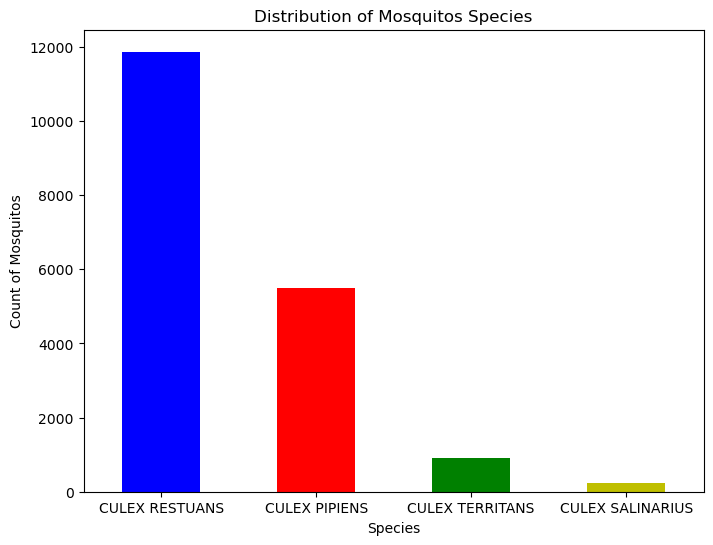

In [24]:
df['Species'].value_counts().plot(kind='bar',color=['b','r','g','y'], title='Distribution of Mosquitos Species', ylabel= 'Count of Mosquitos', xlabel='Species', rot=0); 
# plotting value counts for Species

In [25]:
df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

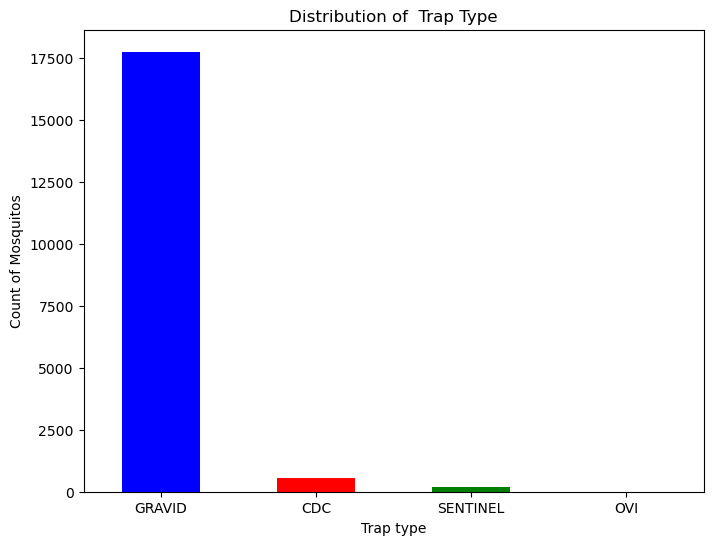

In [26]:
df['Trap type'].value_counts().plot(kind='bar',color=['b','r','g','y'], title='Distribution of  Trap Type', ylabel= 'Count of Mosquitos', xlabel='Trap type', rot=0);
# plotting value counts for trap type

### The categorical variables are storing strings/objects. For their distribution; the largest number of mosquitos are from CULEX RESTUANS species and lowest number of mosquitos are CULEX SALINARIUS species. Trap type with highest number of mosquito caught is GRAVID, similar OVI trap type catches the least.

In [28]:
df[['Mosquito number', 'Year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Mosquito number  18495 non-null  int64
 1   Year             18495 non-null  int64
dtypes: int64(2)
memory usage: 289.1 KB


### Mosquito number and Year are numeric data types with int64 

In [30]:
df[['Mosquito number','Year']].describe()

,Mosquito number,Year
count,18495.000000,18495.000000
mean,10.879913,2012.905812
std,13.475066,3.725857
min,1.000000,2007.000000
25%,2.000000,2010.000000
50%,5.000000,2013.000000
75%,14.000000,2016.000000
max,50.000000,2019.000000


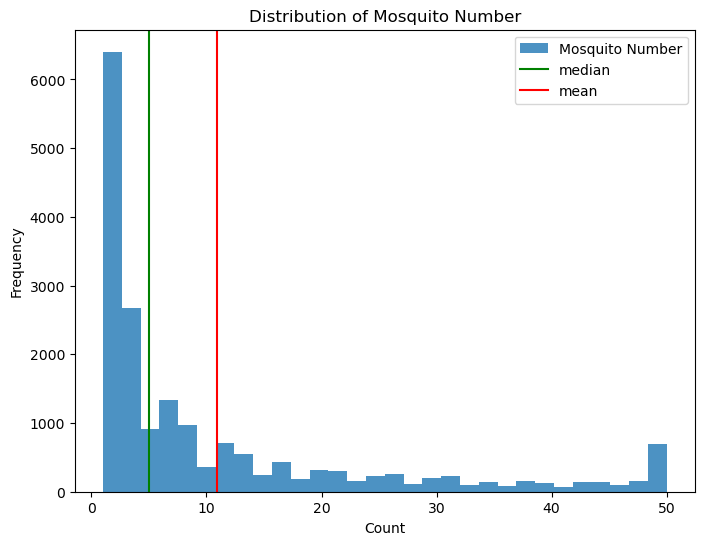

In [31]:
plt.figure()
plt.hist(x=df['Mosquito number'], alpha=0.8, bins=30, label='Mosquito Number')
plt.axvline(df['Mosquito number'].median(), c='green', label='median')
plt.axvline(df['Mosquito number'].mean(), c='red', label='mean')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Mosquito Number')
plt.legend();

### Mosquito number has a right skewed distribution, it is not a normal distribution

In [33]:
df['Year'].value_counts().sort_values(ascending=False)

Year
2007    2141
2014    2000
2016    1844
2013    1624
2010    1397
2012    1392
2018    1361
2019    1209
2015    1178
2009    1135
2011    1120
2017    1110
2008     984
Name: count, dtype: int64

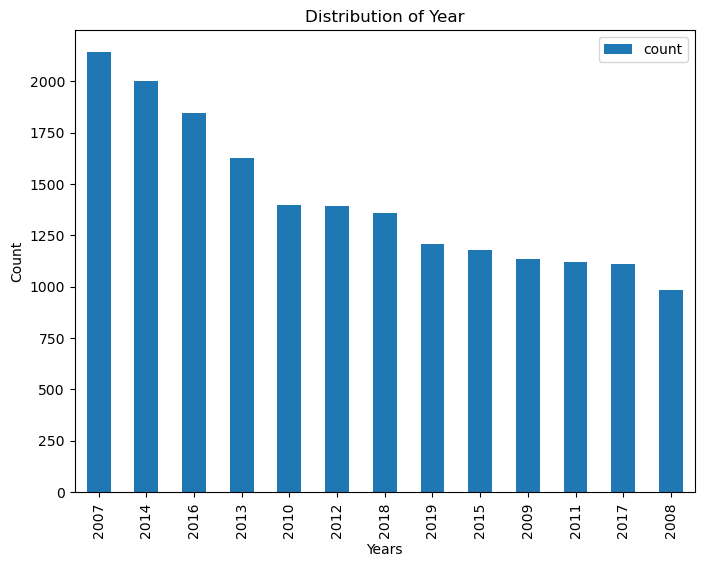

In [34]:
df['Year'].value_counts().plot(kind='bar') # Showing value counts of Years
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.legend();

### Year 2007 has the highest # of sample data values, while 2008 has the lowest number of sample data values

## Q4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [37]:
df.T.duplicated() # T does the transpose and then we check for duplicated among the columns

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [38]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,18485,18486,18487,18488,18489,18490,18491,18492,18493,18494
Year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2018,2016,2007,2017,2013,2016,2007,2016,2017,2015
Week,39,39,39,39,39,39,39,39,39,39,...,33,29,33,30,35,36,34,30,33,33
Address Block,100XX W OHARE AIRPORT,52XX S KOLMAR AVE,58XX N WESTERN AVE,39XX N SPRINGFIELD AVE,131XX S BRANDON AVE,21XX N CANNON DR,11XX W ROOSEVELT RD,22XX W 51ST ST,22XX N CANNON DR,3XX W 104TH ST,...,58XX N RIDGE AVE,100XX W OHARE AIRPORT,17XX W 95TH ST,100XX W OHARE AIRPORT,63XX W 64TH ST,3XX W 18TH ST,46XX N MILWAUKEE AVE,127XX S DOTY AVE,20XX N DOMINICK ST,100XX W OHARE AIRPORT
Block,100,52,58,39,131,21,11,22,22,3,...,58,100,17,100,63,3,46,127,20,100
Trap,T910,T114,T028,T228,T209,T054C,T048,T061,T054A,T095,...,T231,T911,T094,T900,T155,T043,T003,T115,T240B,T902
Trap type,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,...,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,GRAVID,SENTINEL,GRAVID
Date,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,2019-09-26 00:09:00,...,2018-08-16 00:08:00,2016-07-21 00:07:00,2007-08-22 00:08:00,2017-07-27 00:07:00,2013-08-29 00:08:00,2016-09-09 00:09:00,2007-08-24 00:08:00,2016-07-27 00:07:00,2017-08-17 00:08:00,2015-08-20 00:08:00
Mosquito number,2,1,2,1,9,2,3,2,1,1,...,3,47,28,17,3,4,19,34,50,6
Mosquito ID,Res,Res,Res,Res,Res,Res,Res,Res,Ter,Sal,...,Res,Res,Pip,Res,Pip,Pip,Pip,Res,Res,Res
WNV Present,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive


### Mosquito Id and Block can be dropped from df since they are similar to Species name and Address Block columns present in the data frame

In [40]:
df=df.drop(columns=['Mosquito ID', 'Block'])
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758


# Q5.Are there any null values in the dataframe? If so, deal with them appropriately.

In [42]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  object        
 8   Species          18495 non-null  object        
 9   Lat              15571 non-null  float64       
 10  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.6+ MB


### Null values mostly in  Latitude and Longitude columns/features

In [44]:
df.isna().sum() # to find sum of null values

Year                  0
Week                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

In [45]:
df.isna().mean()*100 # to find % of null values in the df

Year                0.000000
Week                0.000000
Address Block       0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

### Almost ~16% of data is null in these two categories

In [47]:
# Finding the rows where Lat or Lon is null
null_coords = df[df[['Lat', 'Lon']].isna().any(axis=1)]

# Grouping by Address Block and count the number of null occurrences
grouped_nulls = null_coords.groupby('Address Block')[['Lat', 'Lon']].size().reset_index(name='Null Count').sort_values(by='Null Count',ascending=False)
grouped_nulls

,Address Block,Null Count
1,100XX W OHARE AIRPORT,2039
5,4XX W 127TH,301
0,100XX W OHARE,226
7,79XX S CHICAGO,136
8,81XX S ASHLAND,122
2,115XX S AVENUE L,40
6,65XX N OAK PARK AVE,24
3,30XX S HOYNE,15
9,98XX S AVENUE G,11
4,43XX N ASHLAND,10


### To remove these Null values we will replace them with coordinates found from Google for the corresponding Address Block

In [49]:
# Changing for Address Block: 100XX W OHARE AIRPORT 
lon= -87.904724
lat = 41.978611 
mask=df['Address Block']=='100XX W OHARE AIRPORT'
df.loc[mask,'Lat']=df.loc[mask,'Lat'].fillna(lat)
df.loc[mask,'Lon']=df.loc[mask,'Lon'].fillna(lon)       

In [50]:
df.isna().mean()*100

Year               0.000000
Week               0.000000
Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
WNV Present        0.000000
Species            0.000000
Lat                4.785077
Lon                4.785077
dtype: float64

### Null Values are still around ~5%

In [52]:
# Changing for Address Block: 4XX W 127TH	
lat= 41.6637864973916
lon = -87.6239818632919
mask=df['Address Block']=='4XX W 127TH'
df.loc[mask,'Lat']=df.loc[mask,'Lat'].fillna(lat)
df.loc[mask,'Lon']=df.loc[mask,'Lon'].fillna(lon)    

In [53]:
df.isna().mean()*100

Year               0.00000
Week               0.00000
Address Block      0.00000
Trap               0.00000
Trap type          0.00000
Date               0.00000
Mosquito number    0.00000
WNV Present        0.00000
Species            0.00000
Lat                3.15761
Lon                3.15761
dtype: float64

In [54]:
# Changing for Address Block: 100XX W OHARE same as before
lon= -87.904724
lat = 41.978611 
mask=df['Address Block']=='100XX W OHARE'
df.loc[mask,'Lat']=df.loc[mask,'Lat'].fillna(lat)
df.loc[mask,'Lon']=df.loc[mask,'Lon'].fillna(lon)    

In [55]:
df.isna().mean()*100

Year               0.000000
Week               0.000000
Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
WNV Present        0.000000
Species            0.000000
Lat                1.935658
Lon                1.935658
dtype: float64

In [56]:
# Changing for Address Block: 79XX S CHICAGO
lat=41.7345874
lon=-87.5513222
mask=df['Address Block']=='79XX S CHICAGO'
df.loc[mask,'Lat']=df.loc[mask,'Lat'].fillna(lat)
df.loc[mask,'Lon']=df.loc[mask,'Lon'].fillna(lon)    

In [57]:
df.isna().mean()*100

Year               0.000000
Week               0.000000
Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
WNV Present        0.000000
Species            0.000000
Lat                1.200324
Lon                1.200324
dtype: float64

In [58]:
# Changing for Address Block: 81XX S ASHLAND
lat=41.880719122449
lon=-87.6665621020408
mask=df['Address Block']=='79XX S CHICAGO'
df.loc[mask,'Lat']=df.loc[mask,'Lat'].fillna(lat)
df.loc[mask,'Lon']=df.loc[mask,'Lon'].fillna(lon)   

In [59]:
df.isna().mean()*100

Year               0.000000
Week               0.000000
Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
WNV Present        0.000000
Species            0.000000
Lat                1.200324
Lon                1.200324
dtype: float64

### We can stop here, since adding the values to coordinates is not impacting much to our null values, we can drop the missing values for the remaining 1.2 % null data values

Note: Used this website to find cordinates of Address Blocks: https://www.coordinatesfinder.com/

In [62]:
df.dropna(subset=['Lat', 'Lon'],axis=0,inplace=True) # Specifiy where to check for nulls and droping the rows in place
df.isna().mean()*100

Year               0.0
Week               0.0
Address Block      0.0
Trap               0.0
Trap type          0.0
Date               0.0
Mosquito number    0.0
WNV Present        0.0
Species            0.0
Lat                0.0
Lon                0.0
dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18273 entries, 0 to 18494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18273 non-null  int64         
 1   Week             18273 non-null  int64         
 2   Address Block    18273 non-null  object        
 3   Trap             18273 non-null  object        
 4   Trap type        18273 non-null  object        
 5   Date             18273 non-null  datetime64[ns]
 6   Mosquito number  18273 non-null  int64         
 7   WNV Present      18273 non-null  object        
 8   Species          18273 non-null  object        
 9   Lat              18273 non-null  float64       
 10  Lon              18273 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [64]:
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.978611,-87.904724
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


# Part 2 - Basic EDA

### Q1. Using an appropriate visual, or visuals, explore the relationship between Mosquito number and Date.

### Since, both are numeric types we can do line plots or scatter

In [68]:
df[['Date','Mosquito number']].head()

,Date,Mosquito number
0,2019-09-26 00:09:00,2
1,2019-09-26 00:09:00,1
2,2019-09-26 00:09:00,2
3,2019-09-26 00:09:00,1
4,2019-09-26 00:09:00,9


In [69]:
df[['Mosquito number', 'Date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18273 entries, 0 to 18494
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Mosquito number  18273 non-null  int64         
 1   Date             18273 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 428.3 KB


In [70]:
grouped_date_df=df['Mosquito number'].groupby(df['Date']).count().reset_index() # grouping by date and counting values for the date
grouped_date_df.head()

,Date,Mosquito number
0,2007-05-29 00:05:00,16
1,2007-06-05 00:06:00,38
2,2007-06-26 04:06:06,9
3,2007-06-26 04:06:07,5
4,2007-06-26 04:06:56,6


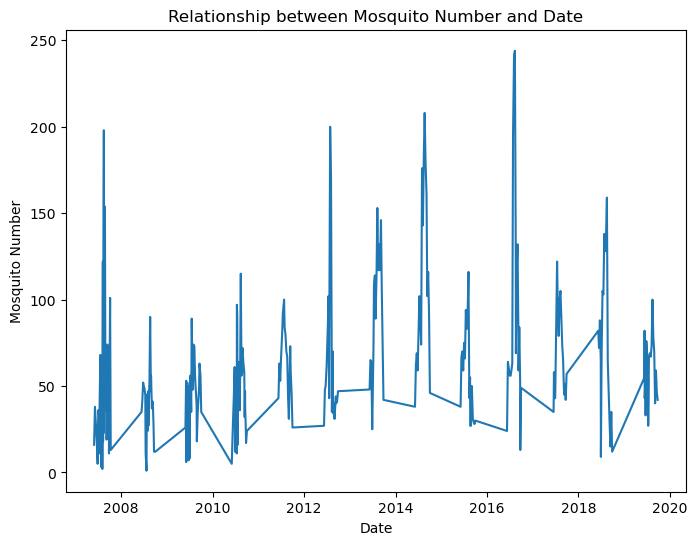

In [71]:
plt.figure()
plt.plot(grouped_date_df['Date'],grouped_date_df['Mosquito number'])
plt.xlabel("Date")
plt.ylabel("Mosquito Number")
plt.title('Relationship between Mosquito Number and Date')
plt.show()

### Difficult to see a good trend here, trying to break date in weeks and years to see if there is a better trend.

In [73]:
grouped_week_df=df['Mosquito number'].groupby(df['Week']).sum().reset_index() # suming numbers acording to weeks
grouped_week_df.head()


,Week,Mosquito number
0,20,95
1,21,403
2,22,621
3,23,4983
4,24,8656


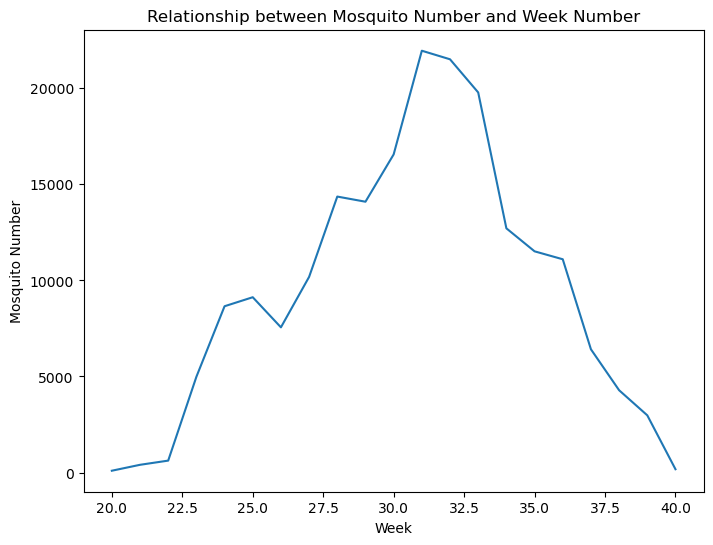

In [74]:
plt.figure()
plt.plot(grouped_week_df['Week'],grouped_week_df['Mosquito number'])
plt.xlabel("Week")
plt.ylabel("Mosquito Number")
plt.title('Relationship between Mosquito Number and Week Number')
plt.show()

### Weeks 30-32 have highest number of Mosquitos

In [75]:
grouped_year_df=df['Mosquito number'].groupby(df['Year']).sum().reset_index()
grouped_year_df.head()

,Year,Mosquito number
0,2007,23379
1,2008,3867
2,2009,5523
3,2010,8107
4,2011,7780


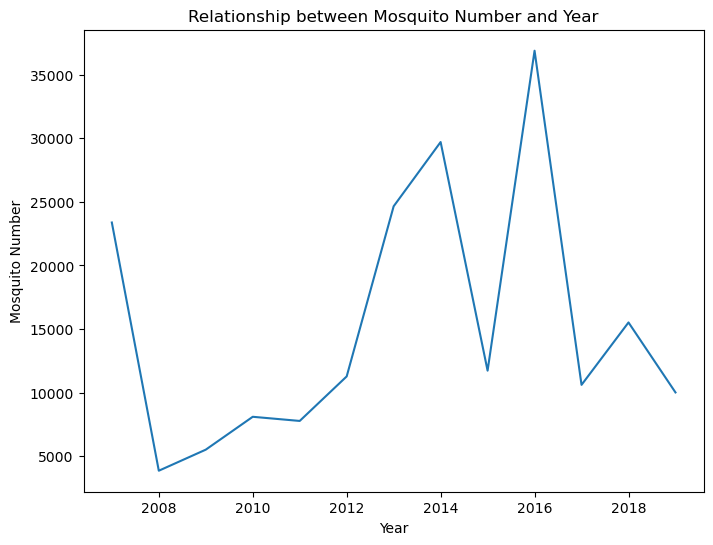

In [76]:
plt.figure()
plt.plot(grouped_year_df['Year'],grouped_year_df['Mosquito number'])
plt.xlabel("Year")
plt.ylabel("Mosquito Number")
plt.title('Relationship between Mosquito Number and Year')
plt.show()

### Trend shows the Mosquitos caught are the highest in 2016.

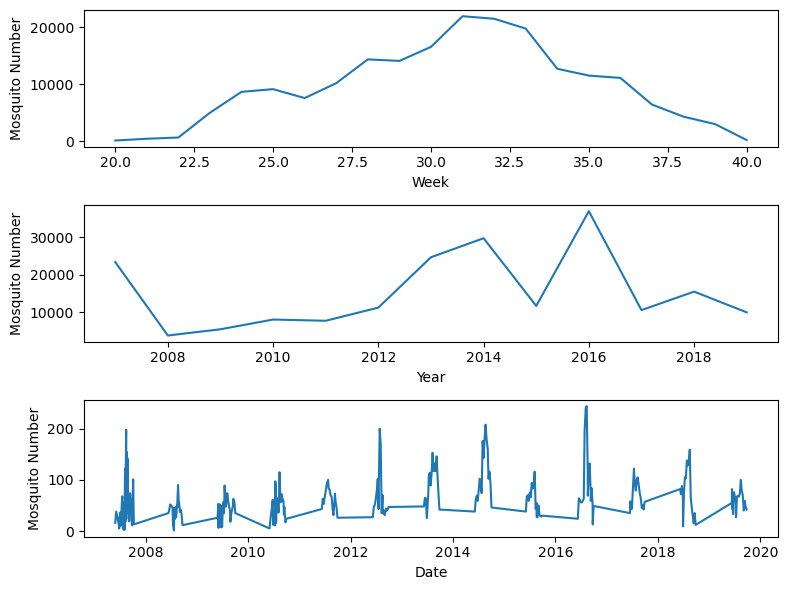

In [77]:
# Plotting trends over these variables  vs Mosquito number in 1 plot
plt.subplots(3, 1) 

plt.subplot(3, 1, 1)  # First position
plt.plot(grouped_week_df['Week'],grouped_week_df['Mosquito number'])
plt.xlabel("Week")
plt.ylabel("Mosquito Number")

plt.subplot(3, 1, 2)  # Second position
plt.plot(grouped_year_df['Year'],grouped_year_df['Mosquito number'])
plt.xlabel("Year")
plt.ylabel("Mosquito Number")

plt.subplot(3, 1, 3)  # Third position
plt.plot(grouped_date_df['Date'],grouped_date_df['Mosquito number'])
plt.xlabel("Date")
plt.ylabel("Mosquito Number")


plt.tight_layout()  #to remove any overlap in plots
plt.show()

### According to the distribution it seems like no mosquitos caught in the intial months of Jan- April and later months of the year similar  Nov-December of the year, most were caught in the summer June-August; weeks 25-35.

# Part 3 - Advanced EDA
## Q.1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.



In [80]:
df[['Species','WNV Present']].head()

,Species,WNV Present
0,CULEX RESTUANS,negative
1,CULEX RESTUANS,negative
2,CULEX RESTUANS,negative
3,CULEX RESTUANS,negative
4,CULEX RESTUANS,negative


In [81]:
df['Species'].value_counts() # Displaying species present and their count

Species
CULEX RESTUANS      11757
CULEX PIPIENS        5386
CULEX TERRITANS       908
CULEX SALINARIUS      222
Name: count, dtype: int64

In [82]:
 df['WNV Present'].value_counts() # Displaying positive cases and negative cases

WNV Present
negative    14312
positive     3961
Name: count, dtype: int64

In [83]:
mask_df=df['WNV Present'].groupby(df['Species']).value_counts()
mask_df.unstack() # to unstack colums from one another

WNV Present,negative,positive
Species,,
CULEX PIPIENS,3998,1388
CULEX RESTUANS,9209,2548
CULEX SALINARIUS,211,11
CULEX TERRITANS,894,14


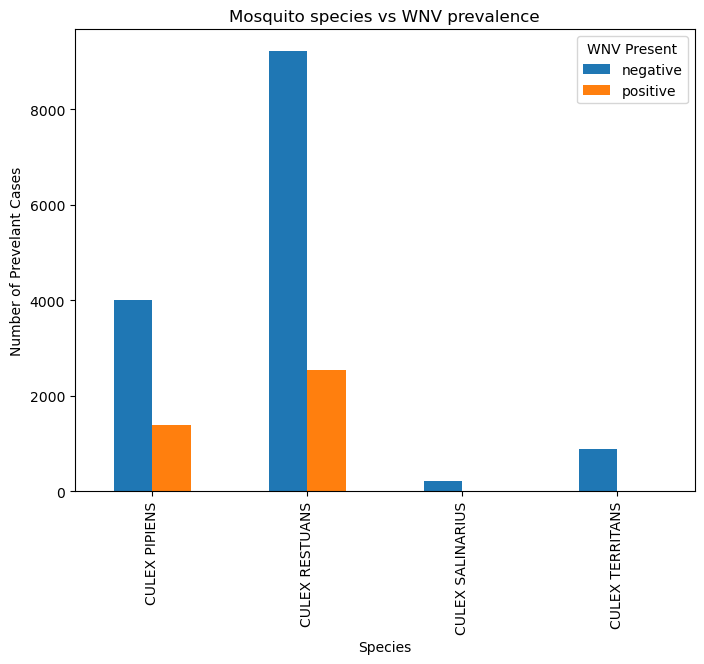

In [84]:
mask_df.unstack().plot.bar(stacked=False, title="Mosquito species vs WNV prevalence", ylabel='Number of Prevelant Cases'); # stack here to show on the same bar

### In this data set, the species RESTUANS has the highest number of WNV positive presence,  followed by PIPIENS, SALINARIUS and TERRITANS.The higher the number of WNV  positive cases in RESTUANS could be be a result of the highest number of samples (~11,000) we have for this species as well. 

## Q 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
Note: This visual should be a different type of visualization than the previous one



C:\Users\karni\AppData\Local\Temp\ipykernel_34268\4277570354.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


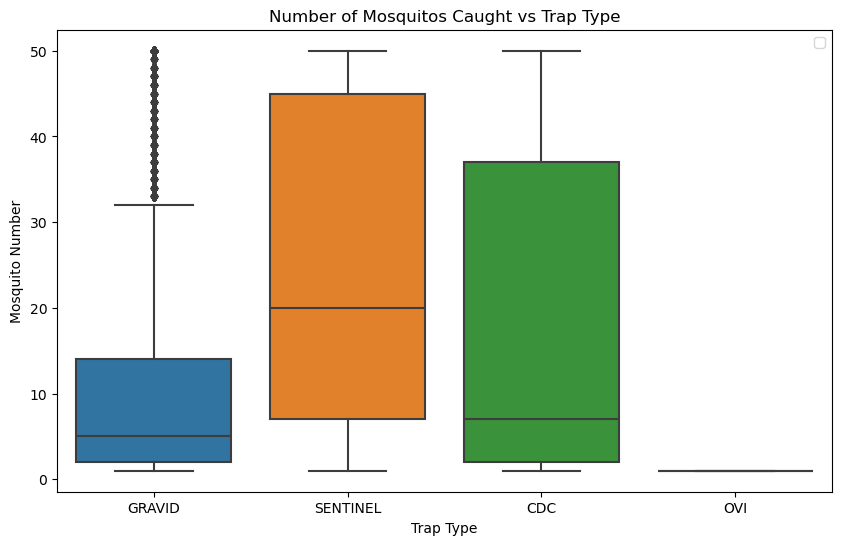

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trap type', y='Mosquito number', data=df)
plt.title('Number of Mosquitos Caught vs Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Mosquito Number')
plt.legend()
plt.show()


This box plot visually compares the effectiveness of different trap types in capturing mosquitoes:

**GRAVID Trap** : Contains highest number of outliers present among the four traps,this inicates it might occasionally perform significantly better than expected others.

**SENTINEL Trap**: Captures mosquitos in significant numbers, probably due to highest median among the four

**CDC Trap**: Similar effectiveness as the SENTINEL trap, but with lower median
 
**OVI Trap**:Appears ineffective in capturing mosquitoes as median seems close to null


## Q3. Using an appropriate visual, come up with an additional insight of your choice.
## Note: This visual should be a different type of visualization than the previous two

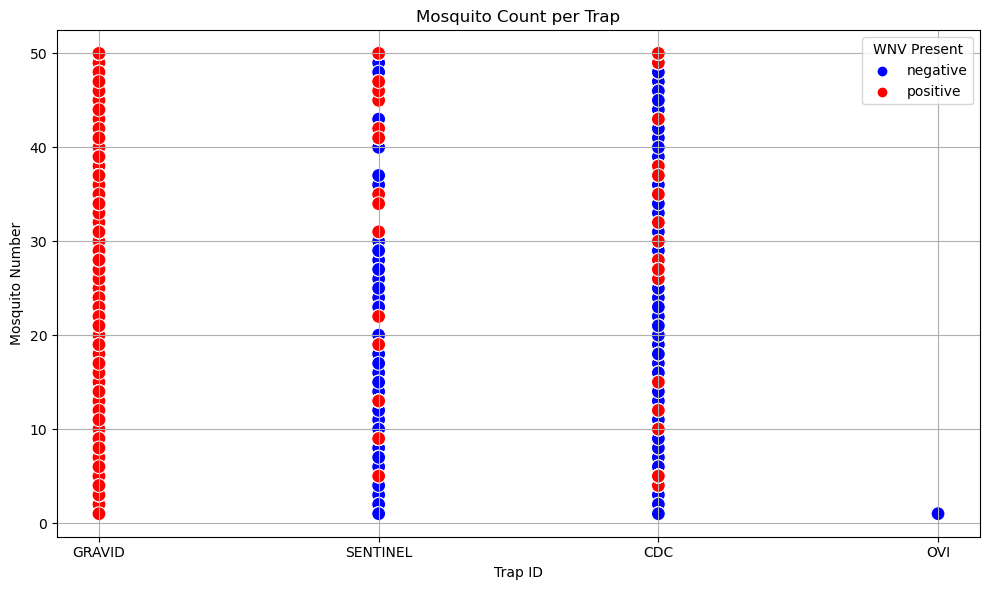

In [90]:
# Convert WNV Present to a binary color map (e.g., red for positive, blue for negative)
color_map = {"positive": "red", "negative": "blue"}

# Plot
plt.figure(figsize=(10, 6)) # Scatter to show realtionship
sns.scatterplot(
    data=df,
    x="Trap type",
    y="Mosquito number",
    hue="WNV Present", # for color
    palette=color_map,
    s=100
)

plt.title("Mosquito Count per Trap")
plt.xlabel("Trap ID")
plt.ylabel("Mosquito Number")
plt.legend(title="WNV Present")
plt.grid(True)
plt.tight_layout()
plt.show()



### Highest number of WNV positive mosquitos are caught by GRAVID trap, followed by SENTINEL and CDC, while OVI trap catches few WNV negative mosquitos

########################################################################################################################################